## 4. Modell Training und Auswahl

Die CSV-Datei enthält die kodierten Daten, die Sie für das Training und die Vorhersage verwenden werden.
Die joblib-Datei enthält die Encoder, die Sie zum Decodieren der kategorischen Merkmale benötigen, wenn Sie die Originalkategorien wiederherstellen möchten.


In [18]:
from joblib import load
import pandas as pd

# Laden der kodierten Daten aus der CSV-Datei
encoded_data_path = '../model/encoded_data.csv'
encoded_data = pd.read_csv(encoded_data_path)


# Laden der Encoder aus der joblib-Datei
encoders_path = '../model/encoders.joblib'
loaded_encoders = load(encoders_path)

# Zeigen Sie die ersten paar Zeilen der kodierten Daten an
encoded_data.head()


,Marke,Modell,Baujahr,Getriebe,Kilometerstand,Kraftstoffart,Verbrauch (l/100km),Motorgröße (l),Preis (€)
0,0,12,2017,2,25322,1,4.25,1.4,14375.0
1,0,17,2016,0,58262,2,3.66,2.0,18975.0
2,0,12,2016,2,48193,1,4.25,1.4,12650.0
3,0,15,2017,0,41765,2,3.50,2.0,19320.0
4,0,14,2019,2,3215,1,4.74,1.0,19895.0


In [19]:
loaded_encoders

{'Marke': LabelEncoder(),
 'Modell': LabelEncoder(),
 'Getriebe': LabelEncoder(),
 'Kraftstoffart': LabelEncoder()}

## XGBoost

In [20]:
from sklearn.model_selection import train_test_split

# Trennung der Merkmale und Labels
X = encoded_data.drop(columns=['Preis (€)'])
y = encoded_data['Preis (€)']

# Aufteilen der Daten in Trainings- und Testsets (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Größe der Trainings- und Testsets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((78167, 8), (19542, 8), (78167,), (19542,))

### Trainieren des Modells

In [21]:
from xgboost import XGBRegressor

# Erstellen des XGBoost-Regressionsmodells
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training des Modells mit den Trainingsdaten
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

### Bewertung des Modells

In [22]:
from sklearn.metrics import mean_absolute_error

# Vorhersagen auf den Testdaten
y_pred = xgb_model.predict(X_test)

# Berechnen des mittleren absoluten Fehlers (MAE) zur Beurteilung der Modellleistung
mae = mean_absolute_error(y_test, y_pred)
print("Mittlerer absoluter Fehler (MAE):", mae)

Mittlerer absoluter Fehler (MAE): 1412.7176209449476


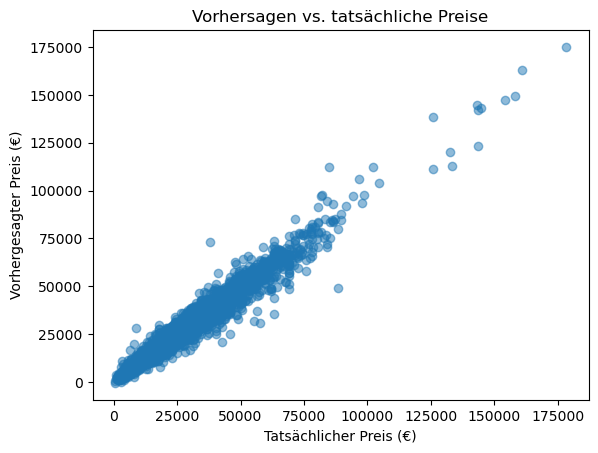

In [23]:
import matplotlib.pyplot as plt

# Scatter Plot der tatsächlichen Preise vs. vorhergesagte Preise
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Tatsächlicher Preis (€)')
plt.ylabel('Vorhergesagter Preis (€)')
plt.title('Vorhersagen vs. tatsächliche Preise')
plt.show()


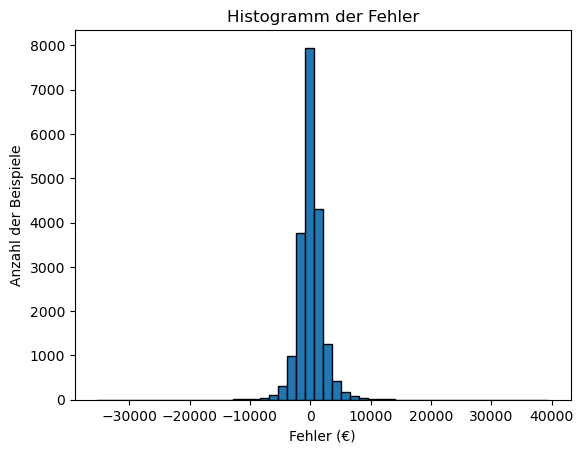

In [24]:
# Berechnen der Fehler
errors = y_test - y_pred

# Histogramm der Fehler
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Fehler (€)')
plt.ylabel('Anzahl der Beispiele')
plt.title('Histogramm der Fehler')
plt.show()